In [1]:
!pip install retina-face
!pip install gdown

  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached retina_face-0.0.17-py3-none-any.whl (25 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [2]:
!pip uninstall keras --y
!pip install -U tensorflow keras

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


# Import Libraries

In [2]:
from retinaface import RetinaFace
import glob
import cv2
import matplotlib.pyplot as plt

# Detect

In [3]:
def detect(image):
        detection = RetinaFace.detect_faces(image)
        for key in detection.keys():
                identity  = detection[key]
                facial_area = identity["facial_area"]
                cv2.rectangle(image, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(0,255,0),1)
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
        plt.axis('off');
        plt.show()


25-01-16 20:51:21 - Directory C:\Users\silwa/.deepface created
25-01-16 20:51:21 - Directory C:\Users\silwa/.deepface/weights created
25-01-16 20:51:21 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: C:\Users\silwa\.deepface\weights\retinaface.h5
100%|██████████| 119M/119M [00:06<00:00, 17.4MB/s] 


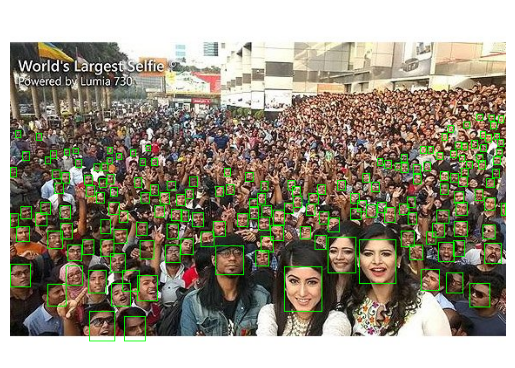

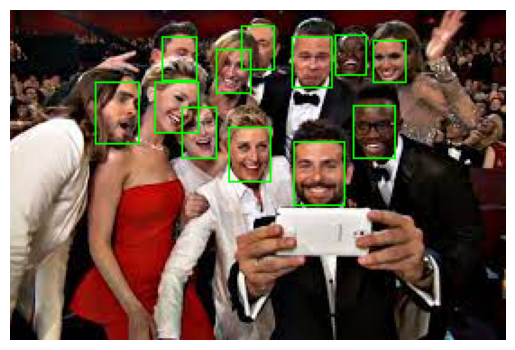

In [4]:
for file in glob.glob('images/*'):
    img = cv2.imread(file)
    detect(img)

# Blur

In [5]:
def blur(image):
    detection = RetinaFace.detect_faces(image)
    for key in detection.keys():
            identity  = detection[key]
            facial_area = identity["facial_area"]

            roi = image[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
            
            blur_image = cv2.GaussianBlur(roi,(15,15),0)
            image[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]] = blur_image

    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
    plt.axis('off');
    plt.show()

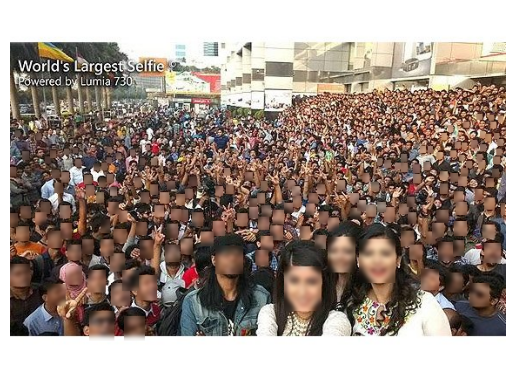

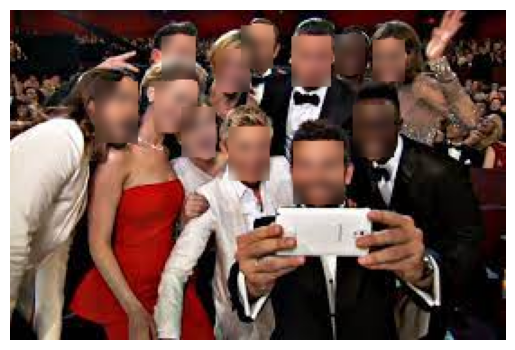

In [6]:
for file in glob.glob('images/*'):
    img = cv2.imread(file)
    blur(img)

# Live Detection

In [7]:
camera = cv2.VideoCapture(0)

while True:
    _,frame = camera.read()
    frame = cv2.flip(frame,180)

    detection = RetinaFace.detect_faces(frame)
    for key in detection.keys():
        identity  = detection[key]
        facial_area = identity["facial_area"]
        print(facial_area)
        cv2.rectangle(frame, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(0,255,0),1)
    
    cv2.imshow("Faces", frame)
    
    if cv2.waitKey(1) == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()
    

[191, 168, 388, 437]
[187, 164, 390, 436]
[210, 175, 417, 449]
[245, 190, 472, 469]
[178, 130, 379, 391]
[171, 191, 375, 450]
[125, 162, 361, 414]
[201, 171, 400, 449]
[201, 164, 403, 446]
